Kaggle - Red wind Quality

```
의도한 대로 결과를 도출하기 어렵고
그 결과로 인사이트를 얻기도 어려운 경우(score 20%대)
```

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(('ignore'))

In [25]:
wine = pd.read_csv('data/winequality-red.csv')

In [26]:
print(wine.shape)
print(wine.quality.value_counts().sort_index())

(1599, 12)
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [27]:
for i in range(len(wine)):
    if wine.iloc[i,11]>=6:
        wine.iloc[i,11]= 1
    else:
        wine.iloc[i,11]= 0

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
wine['target']=le.fit_transform(wine['quality'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [29]:
X = wine.iloc[:, :-2].values
# y = wine.iloc[:, 11].values

In [30]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine)    # 정규화

- PCA (차원축소)

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca2 = PCA(n_components=2)
wine_pca = pca2.fit_transform(wine_std)
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.24236517, 0.21577829]), 0.4581434650968284)

In [33]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# def pca_accuracy(X, y):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, stratify=y, test_size=0.2, random_state=2023
#     )
#     rfc = RandomForestClassifier(random_state=2023)
#     rfc.fit(X_train, y_train)
#     score = rfc.score(X_test, y_test)
#     return score

# for n in [2,4,6,8]:   # 2,4,6차원의 설명력, 정확도를 출력하는 반복문
#     pca = PCA(n_components=n)
#     wine_pca = pca.fit_transform(wine_std)
#     explained = sum(pca.explained_variance_ratio_)
#     print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{acc:.4f}')

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=2023, n_init='auto')
kmeans.fit(wine_std)

KMeans(n_clusters=2, n_init='auto', random_state=2023)

In [36]:
df =pd.DataFrame(wine_std, columns=['PC1','PC2'])
df['target'] = wine.quality
df['cluster'] = kmeans.labels_

ValueError: Shape of passed values is (1599, 13), indices imply (1599, 2)

In [ ]:
df.head()

,PC1,PC2,target,cluster
0,-1.619530,0.450950,0,0
1,-0.799170,1.856553,0,0
2,-0.748479,0.882039,0,0
3,2.357673,-0.269976,1,1
4,-1.619530,0.450950,0,0


In [ ]:
# 데이터 분포
df.groupby(['target','cluster'])[['PC1']].count()

PC1
target cluster     
0      0        546
       1        198
1      0        463
       1        392

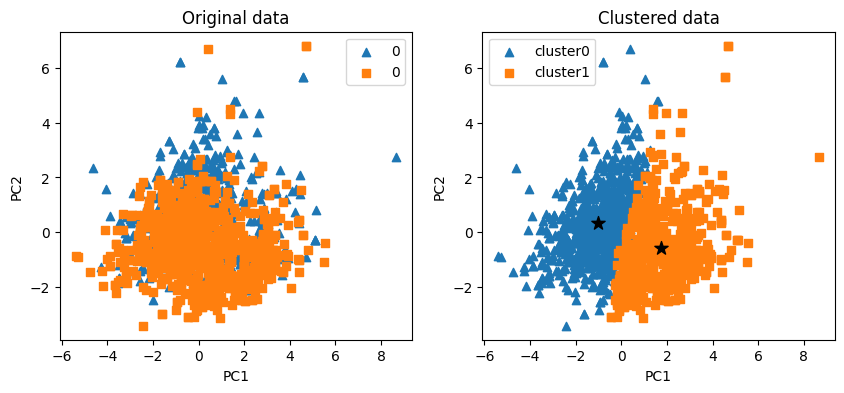

In [ ]:
markers = ['^','s']
plt.figure(figsize=(10,4))
for k, column in enumerate(['target','cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=wine.quality[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data')
    else:
        plt.title('Clustered data')
plt.show()

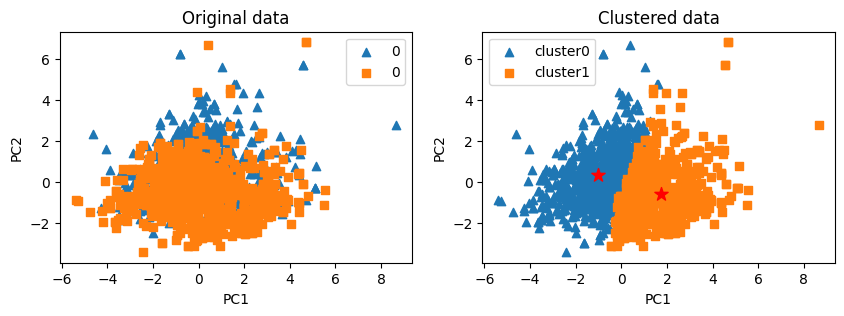

In [ ]:
# 오리지널 데이터에 적용해보기

plt.figure(figsize=(10,3))
for k,column in enumerate (['target','cluster']):
    plt.subplot(1,2,k+1)
    for i , marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=wine.quality[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100) # 중심점 추가

    plt.legend()
    plt.xlabel('PC1'), plt.ylabel('PC2')
    if k == 0:
        plt.title("Original data")
    else:
        plt.title("Clustered data")
plt.show()

### 군집화 평가 - 실루엣(silhouette) 분석

In [ ]:
import warnings
warnings.filterwarnings(('ignore'))

from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
sil_samples = silhouette_samples(wine_std, kmeans.labels_)
df['실루엣 계수'] = sil_samples
df.head()

,PC1,PC2,target,cluster,실루엣 계수
0,-1.619530,0.450950,0,0,0.441496
1,-0.799170,1.856553,0,0,0.153249
2,-0.748479,0.882039,0,0,0.343927
3,2.357673,-0.269976,1,1,0.264095
4,-1.619530,0.450950,0,0,0.441496


- 실루엣 스코어

In [ ]:
silhouette_score(wine_std, kmeans.labels_)

0.19026993359264513

In [ ]:
df['실루엣 계수'].mean()

0.19026993359264513

In [ ]:
df.groupby('cluster')[['실루엣 계수']].mean()

,실루엣 계수
cluster,
0,0.190186
1,0.190414


- 실루엣 스코어 시각화

In [ ]:
kmeans2 = KMeans(n_clusters=2, n_init='auto')
kmeans2.fit(wine_std)
silhouette_score(wine_std, kmeans2.labels_) # 두 그룹으로 나눈 스코어가 더 높음

0.2069631880713393

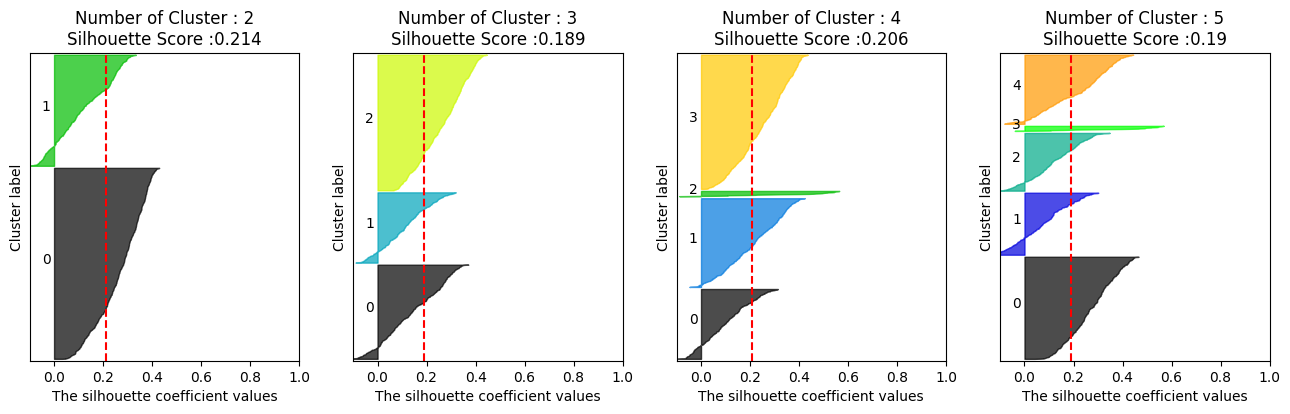

In [ ]:
# visualize.py와 연동
from visualize import visualize_silhouette
visualize_silhouette([2, 3, 4, 5], wine_std)   # 빨간선이 score